In [11]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [19]:
image = plt.imread(r'C:/Users/gdnau/Downloads/images.jpg')


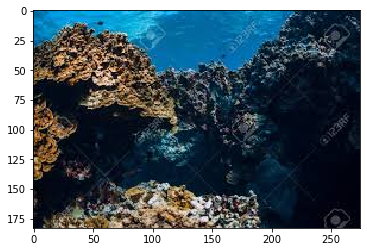

In [20]:
image.shape
plt.imshow(image)

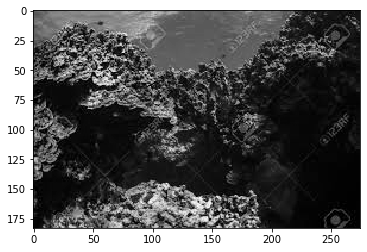

In [21]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [22]:
gray.shape

(183, 275)

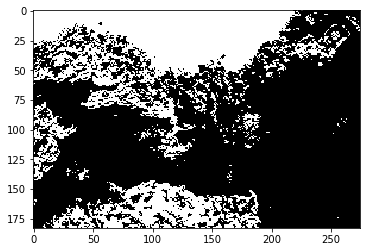

In [23]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [24]:

gray = rgb2gray(image)



# defining the sobel filters

sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])

print(sobel_horizontal, 'is a kernel for detecting horizontal edges')

 

sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])

print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [25]:

out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')

out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')

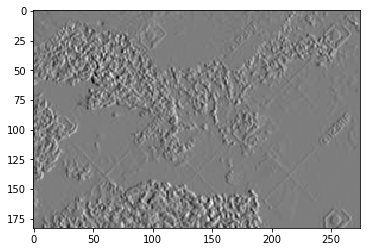

In [26]:
plt.imshow(out_h, cmap='gray')
plt.imshow(out_v, cmap='gray')

In [27]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


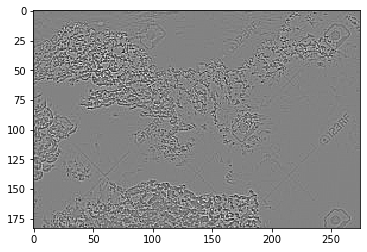

In [28]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')

plt.imshow(out_l, cmap='gray')

(183, 275, 3)


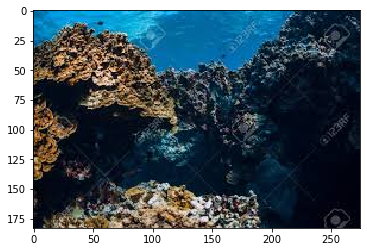

In [30]:

pic = plt.imread(r'C:/Users/gdnau/Downloads/images.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1

print(pic.shape)

plt.imshow(pic)

In [31]:

pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])

pic_n.shape


(50325, 3)

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)

pic2show = kmeans.cluster_centers_[kmeans.labels_]

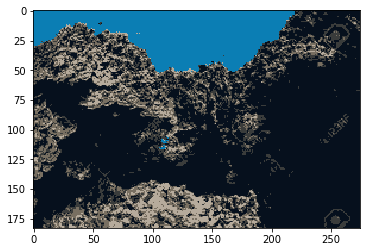

In [33]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])

plt.imshow(cluster_pic)

In [ ]:

import numpy as np
import cv2
import sys




# Reading the images from command line, using cv2.imread() to read an image
#image1 =cv2.imread(sys.argv[1])
#image1 = cv2.imread("Input/image1.jpg")
#image2 = cv2.imread("Input/image2.jpg")
#image3 = cv2.imread("Input/image3.jpg")

image1 = cv2.imread(r'C:/Users/gdnau/Downloads/images.jpg')

# There are 3 features, say, R,G,B. So we need to reshape the image to an array of Mx3 size (M is number of pixels in image

Z1 = image1.reshape((-1,3))

# convert to np.float32
Z1 = np.float32(Z1)


# define criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# define number of clusters(K)
K1 = 5



# Apply kmeans()
compactness_image1,clusterLabel_image1,clusterCenter_image1=cv2.kmeans(Z1,K1,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
clusterCenter_image1 = np.uint8(clusterCenter_image1)
res_image1 = clusterCenter_image1[clusterLabel_image1.flatten()]
clustered_image1 = res_image1.reshape((image1.shape))



# Write images
cv2.imwrite('Clustered_image1.jpg',clustered_image1)


# Display images
cv2.imshow('Clustered_image1', clustered_image1)



cv2.waitKey(0)

# destroys all the windows that are created.
cv2.destroyAllWindows()

In [1]:



import cv2
import matplotlib.pyplot as plt

# Turn on interactive mode. Turn off with plt.ioff()
#plt.ion()

In [48]:
import numpy as np
import scipy.misc
import scipy.ndimage
import skimage.filters
import sklearn.metrics
import imageio
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
image =imageio.imread(r'C:/Users/gdnau/Downloads/images.jpg')

In [49]:
grayscale = rgb2gray(image)

(-0.5, 274.5, 182.5, -0.5)

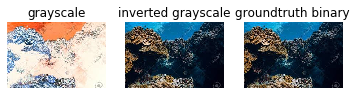

In [50]:
#grayscale = imageio.imread(r'C:/Users/gdnau/Downloads/images.jpg')
grayscale = 255 - grayscale
groundtruth = imageio.imread(r'C:/Users/gdnau/Downloads/images.jpg')
plt.subplot(1, 3, 1)
plt.imshow(255 - grayscale, cmap='gray')
plt.title('grayscale')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(grayscale, cmap='gray')
plt.title('inverted grayscale')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(groundtruth, cmap='gray')
plt.title('groundtruth binary')
plt.axis('off')

Text(0.5, 1.0, 'median filtered image')

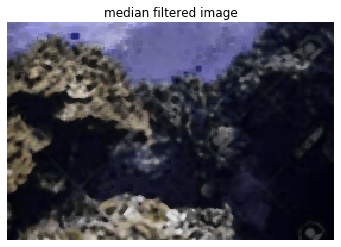

In [51]:
median_filtered = scipy.ndimage.median_filter(grayscale, size=4)
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')
plt.title('median filtered image')

Text(0, 0.5, 'Count')

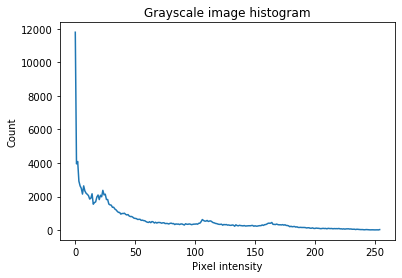

In [52]:
counts, vals = np.histogram(grayscale, bins=range(2 ** 8))
plt.plot(range(0, (2 ** 8) - 1), counts)
plt.title('Grayscale image histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Count')

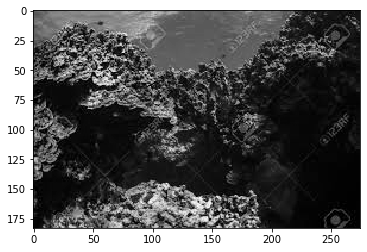

In [58]:

gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [60]:
gray.shape

(183, 275)

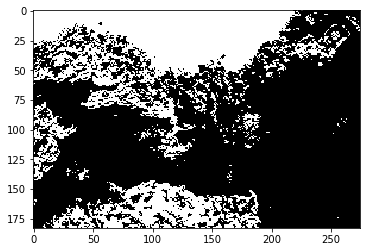

In [61]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


c:\users\gdnau\appdata\local\programs\python\python37\lib\site-packages\skimage\filters\thresholding.py:638: RuntimeWarning: divide by zero encountered in log
  (np.log(mean_back) - np.log(mean_fore)))


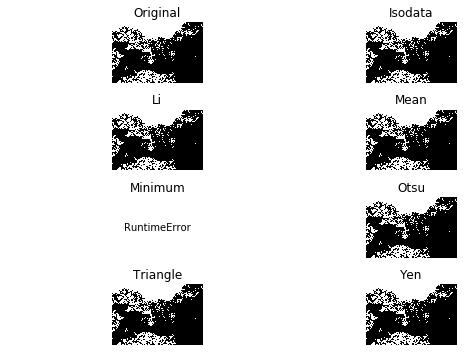

In [62]:
result = skimage.filters.thresholding.try_all_threshold(gray)


c:\users\gdnau\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (183, 275, 3) looks like an RGB image
  """Entry point for launching an IPython kernel.


Threshold value is 73


Text(0.5, 1.0, 'otsu predicted binary image')

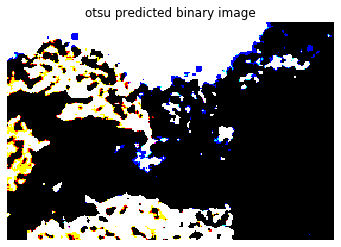

In [64]:
threshold = skimage.filters.threshold_otsu(median_filtered)
print('Threshold value is {}'.format(threshold))
predicted = np.uint8(median_filtered > threshold) * 255
plt.imshow(predicted, cmap='gray')
plt.axis('off')
plt.title('otsu predicted binary image')

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import data
from skimage.metrics import (adapted_rand_error,
                              variation_of_information)
from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.feature import canny
from skimage.morphology import remove_small_objects
from skimage.segmentation import (morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  watershed,
                                  mark_boundaries)
from skimage.feature import greycomatrix


im = cv2.imread(r'C:/Users/gdnau/Downloads/images.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ngcm= greycomatrix(im, [1], [0], 256, symmetric=False, normed=True)

In [28]:
elevation_map = sobel(im)
markers = np.zeros_like(im)
#markers[image < 30] = 1
#markers[image > 150] = 2
im_true = watershed(elevation_map, markers)
im_true = ndi.label(ndi.binary_fill_holes(im_true - 1))[0]


In [26]:
edges = sobel(im)
im_test1 = watershed(edges, markers=468, compactness=0.001)
im_test1

array([[  1,   1,   1, ...,  81,  81,  81],
       [  1,   1,   1, ...,  81,  81,  81],
       [  1,   1,   1, ...,  81,  81,  81],
       ...,
       [460, 460, 460, ..., 459, 459, 459],
       [460, 460, 460, ..., 459, 459, 459],
       [460, 460, 460, ..., 459, 459, 459]])

In [30]:
edges = canny(im)
fill_coins = ndi.binary_fill_holes(edges)
im_test2 = ndi.label(remove_small_objects(fill_coins, 21))[0]



## Method: Compact watershed
Adapted Rand error: 0.9915184853042309
Adapted Rand precision: 0.004258817961447871
Adapted Rand recall: 1.0
False Splits: 8.165461658441066
False Merges: 2.2097754809723793e-17

## Method: Canny filter
Adapted Rand error: 0.10162904393172378
Adapted Rand precision: 0.81549316534174
Adapted Rand recall: 1.0
False Splits: 1.0004813969394684
False Merges: 4.105732925902944e-18

## Method: Morphological Geodesic Active Contours
Adapted Rand error: 0.31964728403851683
Adapted Rand precision: 0.5155564855780247
Adapted Rand recall: 1.0
False Splits: 1.0339962050042901
False Merges: 1.5872636181995258e-16


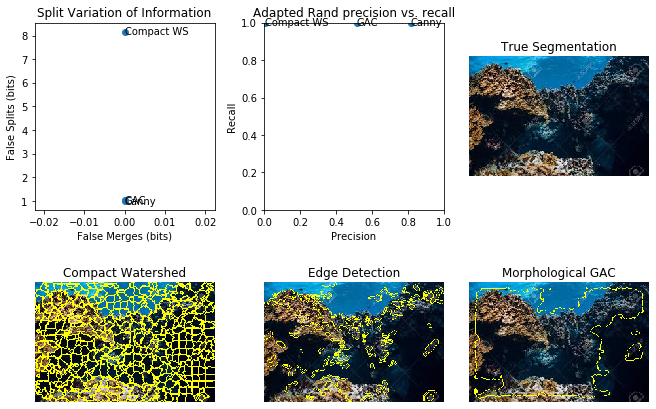

In [31]:
gradient = inverse_gaussian_gradient(im)
init_ls = np.zeros(im.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
im_test3 = morphological_geodesic_active_contour(gradient, iterations=100,
                                                 init_level_set=init_ls,
                                                 smoothing=1, balloon=-1,
                                                 threshold=0.69)
im_test3 = label(im_test3)

method_names = ['Compact watershed', 'Canny filter',
                'Morphological Geodesic Active Contours']
short_method_names = ['Compact WS', 'Canny', 'GAC']

precision_list = []
recall_list = []
split_list = []
merge_list = []
for name, im_test in zip(method_names, [im_test1, im_test2, im_test3]):
    error, precision, recall = adapted_rand_error(im_true, im_test)
    splits, merges = variation_of_information(im_true, im_test)
    split_list.append(splits)
    merge_list.append(merges)
    precision_list.append(precision)
    recall_list.append(recall)
    print(f"\n## Method: {name}")
    print(f"Adapted Rand error: {error}")
    print(f"Adapted Rand precision: {precision}")
    print(f"Adapted Rand recall: {recall}")
    print(f"False Splits: {splits}")
    print(f"False Merges: {merges}")

fig, axes = plt.subplots(2, 3, figsize=(9, 6), constrained_layout=True)
ax = axes.ravel()

ax[0].scatter(merge_list, split_list)
for i, txt in enumerate(short_method_names):
    ax[0].annotate(txt, (merge_list[i], split_list[i]),
                   verticalalignment='center')
ax[0].set_xlabel('False Merges (bits)')
ax[0].set_ylabel('False Splits (bits)')
ax[0].set_title('Split Variation of Information')

ax[1].scatter(precision_list, recall_list)
for i, txt in enumerate(short_method_names):
    ax[1].annotate(txt, (precision_list[i], recall_list[i]),
                   verticalalignment='center')
ax[1].set_xlabel('Precision')
ax[1].set_ylabel('Recall')
ax[1].set_title('Adapted Rand precision vs. recall')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)

ax[2].imshow(mark_boundaries(image, im_true))
ax[2].set_title('True Segmentation')
ax[2].set_axis_off()

ax[3].imshow(mark_boundaries(image, im_test1))
ax[3].set_title('Compact Watershed')
ax[3].set_axis_off()

ax[4].imshow(mark_boundaries(image, im_test2))
ax[4].set_title('Edge Detection')
ax[4].set_axis_off()

ax[5].imshow(mark_boundaries(image, im_test3))
ax[5].set_title('Morphological GAC')
ax[5].set_axis_off()

plt.show()



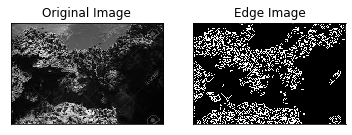

In [76]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r'C:/Users/gdnau/Downloads/images.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()